In [8]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2020, 12, 31)

ticker = "SPY"
time_period = "3mo"
y = yf.Ticker(ticker)
data = y.history(period=time_period)
time_period = data.shape[0]
# data = pdr.get_data_yahoo(ticker, start, end)

Refrernce: https://www.learnpythonwithrune.org/calculate-the-volatility-of-historic-stock-prices-with-pandas-and-python/

In [9]:
s = time.time()
data['Log returns'] = np.log(data['Close']/data['Close'].shift())
data['Log returns'].std()
volatility = data['Log returns'].std()*np.sqrt(time_period)
print("this took", time.time()-s,"seconds")

this took 0.0061109066009521484 seconds


Text(0.5, 1.0, 'SPY volatility: 8.41%')

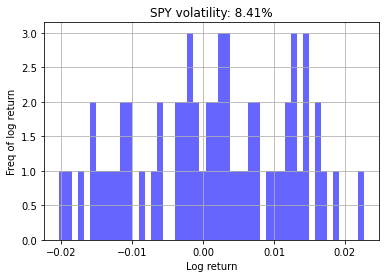

In [10]:
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title(f"{ticker} volatility: " + str_vol + "%")

In [5]:
def ticker_volatility_matrix(ticker,time_period="3mo"):
    y = yf.Ticker(ticker)
    data = y.history(period=time_period)
    time_period = data.shape[0]
    data['Log returns'] = np.log(data['Close']/data['Close'].shift())
    data['Log returns'].std()
    volatility = data['Log returns'].std()*np.sqrt(time_period)
    return [ticker,volatility,y.fast_info['lastPrice']]
    

In [6]:
print(ticker_volatility_matrix("AAPL"))
print(ticker_volatility_matrix("TSLA"))
print(ticker_volatility_matrix("SPY"))

['AAPL', 0.11337056348564678, 164.89999389648438]
['TSLA', 0.31130430477599014, 207.4600067138672]
['SPY', 0.0840699586816636, 409.3900146484375]


In [7]:
from get_ticker_object import ticker_list

_tick_list = [ticker.tick for ticker in ticker_list]
_tick_list


['A',
 'AA',
 'AAC',
 'AACG',
 'AACI',
 'AADI',
 'AAIC',
 'AAL',
 'AAMC',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAU',
 'AAWW',
 'ABB',
 'ABBV',
 'ABC',
 'ABCB',
 'ABCL',
 'ABCM',
 'ABEO',
 'ABEV',
 'ABG',
 'ABGI',
 'ABIO',
 'ABM',
 'ABNB',
 'ABOS',
 'ABR',
 'ABSI',
 'ABST',
 'ABT',
 'ABUS',
 'ABVC',
 'AC',
 'ACA',
 'ACAC',
 'ACAD',
 'ACAH',
 'ACAX',
 'ACB',
 'ACBA',
 'ACCD',
 'ACCO',
 'ACDC',
 'ACDI',
 'ACEL',
 'ACER',
 'ACET',
 'ACGL',
 'ACHC',
 'ACHL',
 'ACHR',
 'ACHV',
 'ACI',
 'ACIU',
 'ACIW',
 'ACLS',
 'ACLX',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACNT',
 'ACON',
 'ACOR',
 'ACQR',
 'ACR',
 'ACRE',
 'ACRO',
 'ACRS',
 'ACRV',
 'ACRX',
 'ACST',
 'ACT',
 'ACTG',
 'ACU',
 'ACVA',
 'ACXP',
 'ADAG',
 'ADAL',
 'ADAP',
 'ADBE',
 'ADC',
 'ADCT',
 'ADD',
 'ADEA',
 'ADER',
 'ADES',
 'ADEX',
 'ADI',
 'ADIL',
 'ADM',
 'ADMA',
 'ADMP',
 'ADN',
 'ADNT',
 'ADOC',
 'ADP',
 'ADPT',
 'ADRA',
 'ADRT',
 'ADSE',
 'ADSK',
 'ADT',
 'ADTH',
 'ADTN',
 'ADTX',
 'ADUS',
 'ADV',
 'ADVM',


In [36]:
def ticker_volatility_data(tickers):
    '''
    result -> [[ticker,volatility,lastPrice]]
    '''
    s = time.time()
    vol_list = []
    
    num_ticker = len(tickers)
    
    run_count = 0
    tc = 0
    for i,tick in enumerate(tickers):
        try:
            vol_list.append(ticker_volatility_matrix(tick))
        except:
            print("error with ticker:", tick,"omitting.")
        
        run_count +=1
        tc+=1
        
        if tc >= num_ticker*.05:
            tc = 0
            print("calculation",(run_count/num_ticker)*100,"% done.")
            
            time_per_ticker = (time.time()-s)//run_count
            print("appx time remaining:", (num_ticker-run_count)*time_per_ticker )
    
    print('this calculation took:',time.time()-s,"seconds")
    return vol_list


matrix = ticker_volatility_data(_tick_list)
ticker_volatility_df = pd.DataFrame(matrix,columns=['Ticker','Volatility', 'LastPrice'])
ticker_volatility_df

AKO.A: No data found, symbol may be delisted
error with ticker: AKO.A omitting.
AKO.B: No data found, symbol may be delisted
error with ticker: AKO.B omitting.
BF.A: No data found, symbol may be delisted
error with ticker: BF.A omitting.
error with ticker: BF.B omitting.
error with ticker: BIO.B omitting.
BRK.A: No data found, symbol may be delisted
error with ticker: BRK.A omitting.
BRK.B: No data found, symbol may be delisted
error with ticker: BRK.B omitting.
CRD.A: No data found, symbol may be delisted
error with ticker: CRD.A omitting.
CRD.B: No data found, symbol may be delisted
error with ticker: CRD.B omitting.
ECC           : No data found, symbol may be delisted
error with ticker: ECC            omitting.
EMN: No data found for this date range, symbol may be delisted
error with ticker: ENVA omitting.
EQH.A: No data found, symbol may be delisted
error with ticker: EQH.A omitting.
HEI.A: No data found, symbol may be delisted
error with ticker: HEI.A omitting.
HVT.A: No data fou

,Ticker,Volatility,LastPrice
0,A,0.124050,138.929993
1,AA,0.254989,47.900002
2,AAC,0.010613,10.280000
3,AACG,0.404201,2.470000
4,AACI,0.073207,10.040000
...,...,...,...
5972,ZVSA,1.512758,2.130000
5973,ZWS,0.204617,22.299999
5974,ZYME,0.350411,8.080000
5975,ZYNE,0.387327,0.420000


In [34]:
ticker_volatility_df.to_csv("volatility_df_3mo.csv")

In [35]:
above_30_vol = ticker_volatility_df[ticker_volatility_df["Volatility"]>=.30]
above_150_px = above_30_vol[above_30_vol['LastPrice']>= 150]

above_150_px.to_csv("above_30_vol_150_px.csv")